In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# matrix size
m = 4

# a matrix and a row vector
A = np.random.randn(m,m)
v = np.random.randn(1,m)

# quadratic form for this vector-matrix pair
v@A@v.T

array([[4.50744795]])

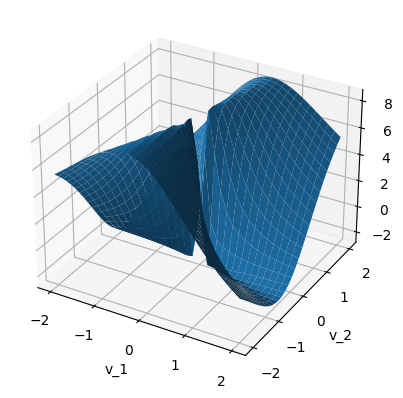

In [3]:
# matrix
A = np.array([[-2,3],[2,8]])

# range of vector elements
vi = np.linspace(-2,2,30)

# initialize
qf = np.zeros((len(vi),len(vi)))

# for the visualization
X,Y = np.meshgrid(vi,vi)

for i in range(len(vi)):
    for j in range(len(vi)):

        # this vector
        v = np.array([ vi[i],vi[j] ])

        # QF (note the normalization term)
        qf[i,j] = v.T@A@v / (v.T@v)


# setup the figure
ax = plt.axes(projection='3d')

# plot a surface
ax.plot_surface(X, Y, qf.T)
ax.set_xlabel('v_1'), ax.set_ylabel('v_2')
ax.set_zlabel('$\zeta$')
plt.show()

In [4]:
# initializations
n = 4 # matrix size
nIterations = 500 # number of matrices
defcat = np.zeros(nIterations) # results


# loop over matrices
for iteri in range(nIterations):

    # keep creating a matrix until it has real-valued evals
    A = np.random.randint(-10,11,size=(n,n))
    e = np.linalg.eig(A)[0]
    while ~np.all(np.isreal(e)):
        A = np.random.randint(-10,11,size=(n,n))
        e = np.linalg.eig(A)[0]

    # "zero" threshold (from rank)
    t = n*np.spacing(np.max(np.linalg.svd(A)[1]))


    # test definiteness
    if np.all(np.sign(e)==1):
        defcat[iteri] = 1 # pos. def
    elif np.all(np.sign(e)>-1)&sum(abs(e)<t)>0:
        defcat[iteri] = 2 # pos. semidef
    elif np.all(np.sign(e)<1)&sum(abs(e)<t)>0:
        defcat[iteri] = 4 # neg. semidef
    elif np.all(np.sign(e)==-1):
        defcat[iteri] = 5 # neg. def
    else:
        defcat[iteri] = 3 # indefinite


In [5]:
# print out summary
for i in range(1,6):
    print('cat %g: %g'%(i,sum(defcat==i)))

cat 1: 2
cat 2: 0
cat 3: 496
cat 4: 0
cat 5: 2
